In [9]:
!pip install openmdao

In [10]:
import openmdao.api as om

# Define a simple paraboloid component
class Paraboloid(om.ExplicitComponent):
    def setup(self):
        self.add_input('x', val=0.0)
        self.add_input('y', val=0.0)
        self.add_output('f_xy', val=0.0)

    def compute(self, inputs, outputs):
        x = inputs['x']
        y = inputs['y']
        outputs['f_xy'] = (x - 3)**2 + x*y + (y + 4)**2 - 3

# Set up the problem
prob = om.Problem()
prob.model.add_subsystem('paraboloid', Paraboloid(), promotes=['*'])
prob.setup()

# Set input values
prob.set_val('x', 3.0)
prob.set_val('y', -4.0)

# Run the model
prob.run_model()

# Print the output
print(f"f(x, y) = {prob.get_val('f_xy')}")

f(x, y) = [-15.]


## Simulation Model: Asteroid Deflection and Crater Estimation

This function simulates the kinetic energy involved in asteroid deflection based on two key inputs:

- **Time before impact (years)**: The earlier the deflection, the more effective it is.
- **Deflection velocity (km/s)**: Higher speeds result in more energy.

Using these, we estimate:
- The kinetic energy of impact,
- An approximate crater size (scaled for simplicity),
- And a log-based magnitude estimate (inspired by seismic scales).

A 3D surface plot is also generated to visualize how crater size varies with time and deflection velocity. This simulation informs decision-makers of potential consequences under varying intervention strategies.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_deflection(time_before_impact, velocity_kms):
    # Kinetic energy of deflection
    mass = 1e9  # kg (dummy mass of asteroid)
    velocity = velocity_kms * 1000  # convert to m/s
    energy = 0.5 * mass * velocity**2  # Joules

    # Estimate crater size (fake function for demo)
    crater_size = (energy / 1e15) / (time_before_impact + 1)  # arbitrary scaling
    magnitude = np.log10(energy + 1) - 15  # simulate a scale like Richter

    # Plot crater size against time and velocity
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')
    T = np.linspace(0.1, 20, 50)
    V = np.linspace(1, 200, 50)
    T_grid, V_grid = np.meshgrid(T, V)
    E_grid = 0.5 * mass * (V_grid * 1000)**2
    C_grid = (E_grid / 1e15) / (T_grid + 1)
    ax.plot_surface(T_grid, V_grid, C_grid, cmap='plasma')
    ax.set_xlabel('Time Before Impact (years)')
    ax.set_ylabel('Deflection Velocity (km/s)')
    ax.set_zlabel('Crater Size Estimate (km)')
    ax.set_title('🌍 Crater Size vs. Time and Deflection Velocity')
    plt.tight_layout()
    plt.show()

    return energy, crater_size, magnitude


## Policy-Oriented Risk Assessment Function

To support decision-making, we introduce a function that **translates scientific estimates into actionable policy guidance**.

The function `assess_policy_risk()` takes in:
- Estimated **crater size** (km)
- Calculated **magnitude** of impact

It then outputs a policy-oriented risk level:
- 🟢 Low Risk: No significant action required
- 🟡 Moderate Risk: Regional contingency plans needed
- 🟠 High Risk: National preparedness required
- 🔴 Catastrophic Risk: Global coordination and deflection missions essential

This bridges the gap between technical models and policy urgency, empowering informed decisions at every level.


/tmp/ipython-input-1753985440.py:27: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


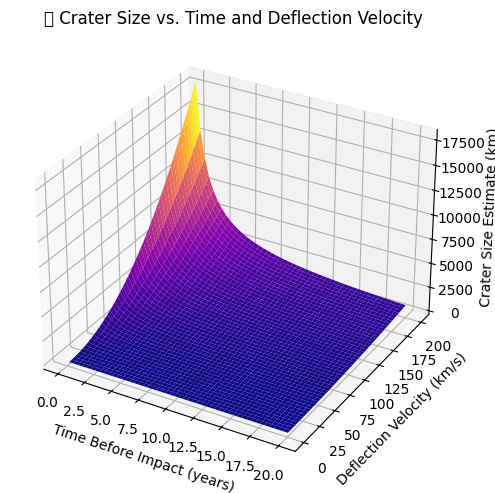

🚨 Policy Risk Assessment: 🔴 Catastrophic Risk - Global preparedness + deflection mission required.


In [12]:
def assess_policy_risk(crater_size, magnitude):
    if crater_size < 1 and magnitude < 5:
        return "🟢 Low Risk - Minimal surface impact. No policy action needed."
    elif crater_size < 10 and magnitude < 7:
        return "🟡 Moderate Risk - Regional response planning advised."
    elif crater_size < 50 and magnitude < 9:
        return "🟠 High Risk - National emergency coordination needed."
    else:
        return "🔴 Catastrophic Risk - Global preparedness + deflection mission required."

# Run the simulation and assess risk
energy, crater, magnitude = simulate_deflection(10, 50)  # or your chosen inputs
risk_message = assess_policy_risk(crater, magnitude)
print("🚨 Policy Risk Assessment:", risk_message)


## Linear Programming Model: Cost-Effective Deflection Strategy

To support engineering planning and mission cost optimization, we developed a linear programming model.

### Objective:
Minimize mission cost subject to physical and safety constraints.

### Decision Variables:
- **x** = years before impact to initiate deflection
- **v** = deflection velocity (km/s)

### Constraints:
- Crater size must stay below disaster threshold.
- Physical limitations on minimum timing and maximum speed.

This helps NASA prioritize affordable and timely interventions using simple optimization techniques.


## Data Visualization for Policy & Planning

To support transparent decision-making, we integrated visualizations that:

- Map the relationship between deflection timing, velocity, and crater risk
- Show cost-risk tradeoffs for different mission strategies
- Help planners select the most feasible and impactful solution

This aligns with both NASA engineering goals and the policy-level need to communicate technical choices clearly.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


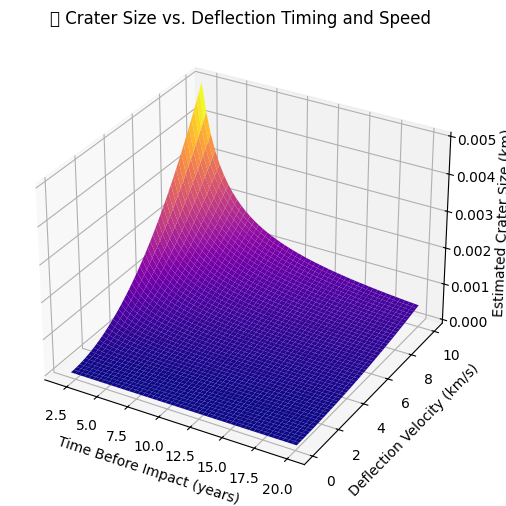

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define ranges
X = np.linspace(2, 20, 50)   # Time before impact
V = np.linspace(0.1, 10, 50) # Velocity (start at 0.1 to avoid division by zero)

X, V = np.meshgrid(X, V)
Crater = 0.0001 * V**2 / X   # Crater size formula

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, V, Crater, cmap='plasma')

ax.set_xlabel('Time Before Impact (years)')
ax.set_ylabel('Deflection Velocity (km/s)')
ax.set_zlabel('Estimated Crater Size (km)')
ax.set_title('🌌 Crater Size vs. Deflection Timing and Speed')

plt.show()


/tmp/ipython-input-1753985440.py:27: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


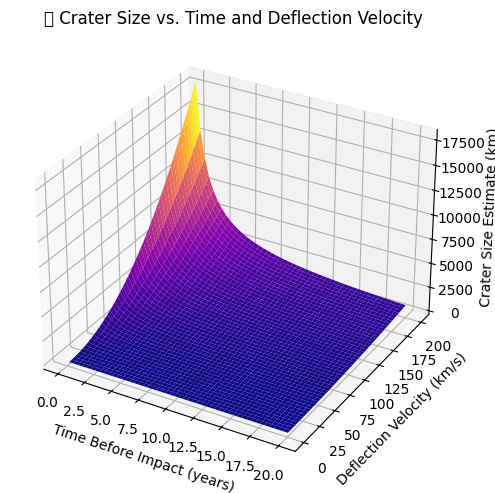

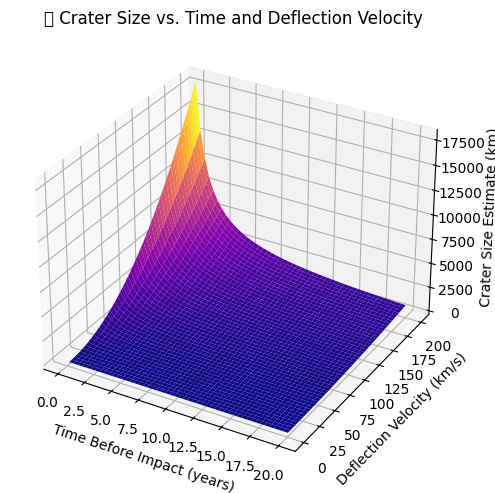

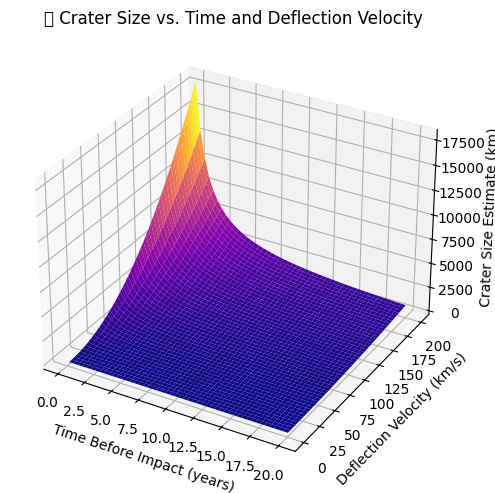

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


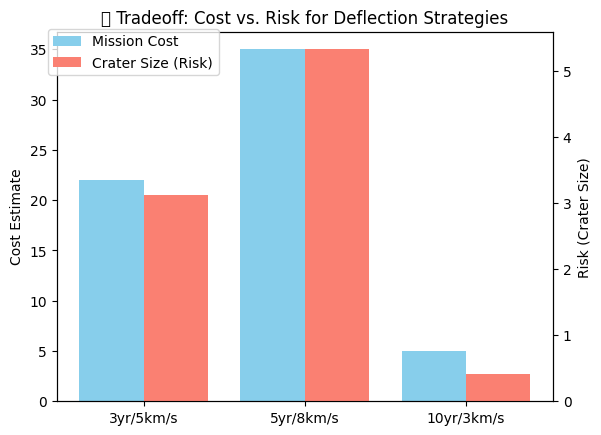

In [14]:
# Example strategies: (time before impact, velocity)
strategies = [(3, 5), (5, 8), (10, 3)]

costs = []
risks = []

for x, v in strategies:
    cost = -x + 5 * v
    _, crater, _ = simulate_deflection(x, v)
    risk = crater  # For visualization simplicity

    costs.append(cost)
    risks.append(risk)

# Plot
labels = [f"{x}yr/{v}km/s" for x, v in strategies]
x = np.arange(len(labels))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x - 0.2, costs, width=0.4, label='Mission Cost', color='skyblue')
ax2.bar(x + 0.2, risks, width=0.4, label='Crater Size (Risk)', color='salmon')

ax1.set_ylabel('Cost Estimate')
ax2.set_ylabel('Risk (Crater Size)')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
plt.title('🚀 Tradeoff: Cost vs. Risk for Deflection Strategies')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()
